# Churn Modelling

In [105]:
import tensorflow as tf

print(tf.__version__)

2.20.0


## Import Basic Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [108]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Divide the dataset into In-Dependent and Dependent features

In [109]:
X = dataset.iloc[:, 3:13] # Independent columns - I want all rows (:) and columns from 3 to 12th (including 12th)
y = dataset.iloc[:, 13] # Dependent column - I want all rows (:) and 13th column (Churn)

print(X.head())
print(y.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


## Feature engineering

In [110]:
geography =pd.get_dummies(dataset["Geography"], drop_first=True)
# Actually without drop_first=True, it would create 3 columns for the 3 countries (France, Germany, Spain)
# But with drop_first=True, it would create 2 columns for the 2 countries (Germany, Spain)
# Because it would drop the first column (France)

# So, we are dropping the first column (France) to avoid multicollinearity
# we can interpret the columns as follows:
# France = 0, Germany = 1, Spain = 0

print(geography.head())


   Germany  Spain
0    False  False
1    False   True
2    False  False
3    False  False
4    False   True


In [111]:
gender = pd.get_dummies(dataset["Gender"], drop_first=True)
# Here we can interpret the columns as follows:
# Male = 0, Female = 1

print(gender.head())

    Male
0  False
1  False
2  False
3  False
4  False


In [112]:
# Now, we can concatenate the dummy variables to the original dataset

# For that first drop the Geography and Gender columns

X = X.drop(['Geography', 'Gender'], axis=1)
print(X.head())

# Now, we can concatenate the dummy variables to the original dataset

X = pd.concat([dataset, geography, gender], axis=1)

print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10  
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   

## Now we can split the dataset to training and testing dataset

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.head())
print(X_train.shape)

      RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
7389       7390    15676909   Mishin          667     Spain  Female   34   
9275       9276    15749265  Carslaw          427   Germany    Male   42   
2995       2996    15582492    Moore          535    France  Female   29   
5316       5317    15780386    Ferri          654     Spain    Male   40   
356         357    15611759  Simmons          850     Spain  Female   57   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7389       5       0.00              2          1               0   
9275       1   75681.52              1          1               1   
2995       2  112367.34              1          1               0   
5316       5  105683.63              1          1               0   
356        8  126776.30              2          1               1   

      EstimatedSalary  Exited  Germany  Spain   Male  
7389        163830.64       0    False   True  False  
9275         57098

## Now we need to use Feature Scaling - For ANN it is very much needed

#### Algo needs FS -> Linear Regression, Logistic Regression, KNN, K-Means, Neural Networks (Which and all involves distance based data (large numerical))

In [117]:
from sklearn.preprocessing import StandardScaler

# First, we need to select only the numerical columns for scaling
# We'll exclude the string columns and keep only the features we need for the model
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male']

# Extract only the numerical columns from X_train and X_test
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_numerical) # We use fit_transform on training data because we want to learn the mean and standard deviation of the training data and then use the same mean and standard deviation to transform the test data
X_test_scaled = scaler.transform(X_test_numerical) # We use transform on test data because we want to use the same mean and standard deviation of the training data to transform the test data (Already learned from training data)

print("Scaled training data shape:", X_train_scaled.shape)
print("First few rows of scaled data:")
print(X_train_scaled[:5])

Scaled training data shape: (8000, 11)
First few rows of scaled data:
[[ 0.16958176 -0.46460796  0.00666099 -1.21571749  0.8095029   0.64259497
  -1.03227043  1.10643166 -0.5698444   1.74309049 -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 -0.00631193 -0.92159124  0.64259497
   0.9687384  -0.74866447  1.75486502 -0.57369368  0.91601335]
 [-1.19119591 -0.94312892 -1.031415    0.57993469 -0.92159124  0.64259497
  -1.03227043  1.48533467 -0.5698444  -0.57369368 -1.09168714]
 [ 0.03556578  0.10961719  0.00666099  0.47312769 -0.92159124  0.64259497
  -1.03227043  1.27652776 -0.5698444   1.74309049  0.91601335]
 [ 2.05611444  1.73658844  1.04473698  0.8101927   0.8095029   0.64259497
   0.9687384   0.55837842 -0.5698444   1.74309049 -1.09168714]]


In [118]:
X_train_scaled.shape

(8000, 11)

## Now we can build the ANN

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Initialize the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

# Adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))



In [135]:
classifier.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

## Train the model now

In [136]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [137]:
model_history = classifier.fit(
    X_train_scaled,
    y_train,
    validation_split = 0.33,
    batch_size = 10,
    epochs = 1000,
    callbacks = early_stopping
)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.7960 - loss: 0.4528 - val_accuracy: 0.7955 - val_loss: 0.4127
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8210 - loss: 0.4015 - val_accuracy: 0.8413 - val_loss: 0.3885
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8378 - loss: 0.3825 - val_accuracy: 0.8474 - val_loss: 0.3833
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8479 - loss: 0.3724 - val_accuracy: 0.8584 - val_loss: 0.3833
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8494 - loss: 0.3661 - val_accuracy: 0.8504 - val_loss: 0.3721
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.8511 - loss: 0.3626 - val_accuracy: 0.8516 - val_loss: 0.3624
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8545 - loss: 0.3606 - val_accuracy: 0.8527 - val_loss: 0.3712
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.8561 - l

In [138]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Plot the Accuracy

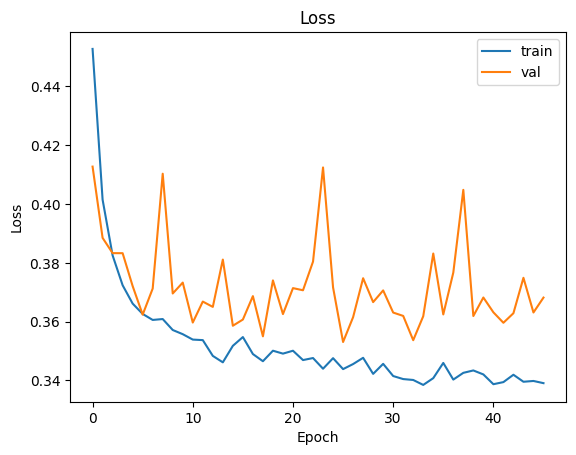

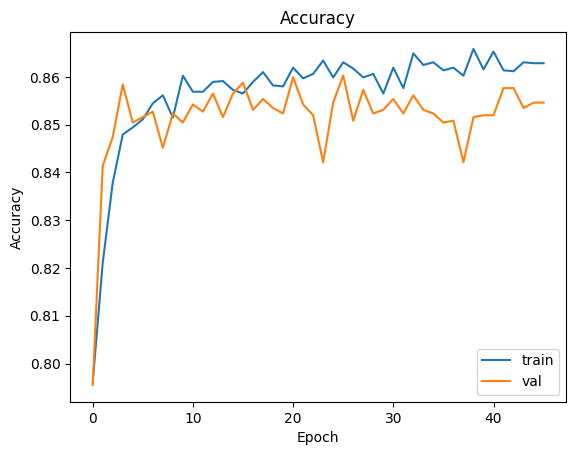

In [139]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test the data

In [140]:
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

print(y_pred)

print(y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]
9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64


In [141]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

print(accuracy_score(y_test, y_pred))

[[1506   89]
 [ 195  210]]
0.858


In [142]:
# We can get the weights and biases of the layers

print(classifier.get_weights())

[array([[ 0.6861744 , -0.11060695,  1.7788908 ,  0.6312998 ,  0.39626396,
         0.3197635 , -0.40910366,  0.60598695, -0.10970268, -0.28813857,
        -0.21256803],
       [-3.8650775 , -0.17180137, -0.34360552, -1.9092094 ,  0.67017496,
        -0.48888072, -1.576057  , -1.1443105 , -3.1057165 ,  2.176366  ,
        -0.1518056 ],
       [ 0.5351713 ,  0.25559583,  1.0477914 ,  0.17560843,  0.4759541 ,
        -0.21102272,  0.08961885,  1.1785083 ,  0.03079906,  0.18830375,
        -0.0211463 ],
       [-0.9283913 , -2.9866855 , -0.07785334,  0.10918534,  0.151028  ,
        -1.8345262 ,  0.5226405 , -2.4403605 ,  0.55232036,  0.51909566,
         0.81860507],
       [-0.05977144,  2.0944726 ,  0.3038449 , -0.10181041, -0.11470433,
         2.2804205 ,  0.67598355,  1.2536782 ,  0.8734442 ,  0.34225088,
         4.1824017 ],
       [ 0.20605902, -0.329441  , -0.40404505, -0.23457968,  0.03953309,
         0.53519744,  0.56674796, -1.4684657 , -0.0248683 , -0.13532996,
        -0.07